In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#load the dataset
df = pd.read_csv("/content/train.csv")
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
#dimension
df.shape

(20758, 18)

In [4]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
#checking null values
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

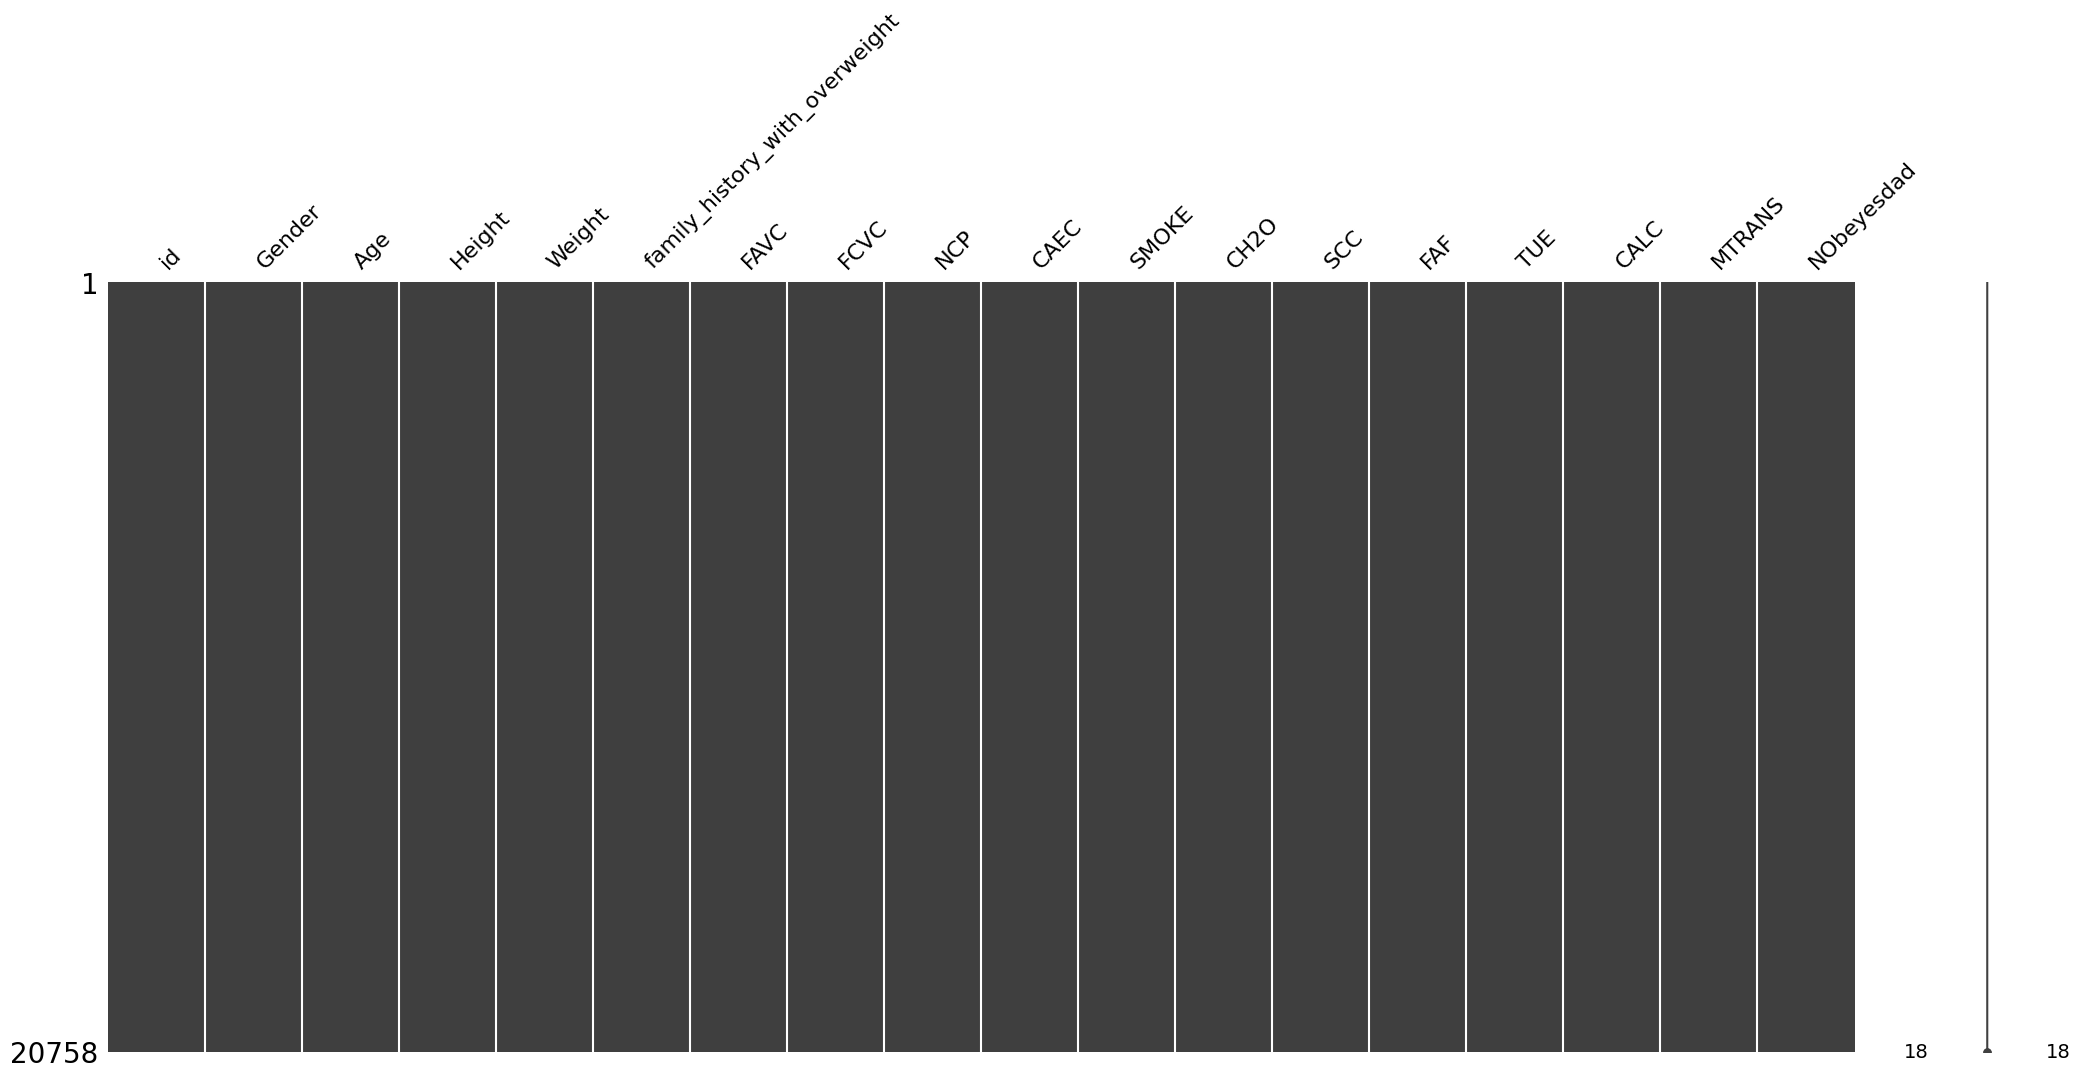

In [6]:
import missingno as msno
msno.matrix(df)
plt.show()

In [7]:
df.duplicated().sum()

0

In [8]:
#List of categorical columns
category = df.select_dtypes(include=['object']).columns.tolist()
category

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

# Exploratory Data Analysis

In [9]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [10]:
#Basic statistics
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


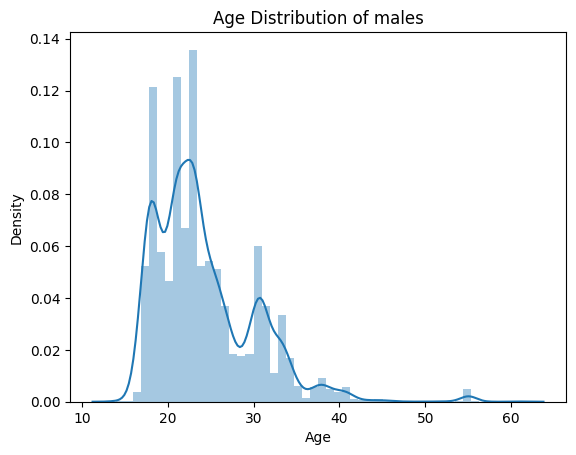

In [14]:
#age distribution
import warnings
warnings.filterwarnings("ignore")

sns.distplot(df[df['Gender']=="Male"]['Age'])
plt.title("Age Distribution of males")
plt.show()

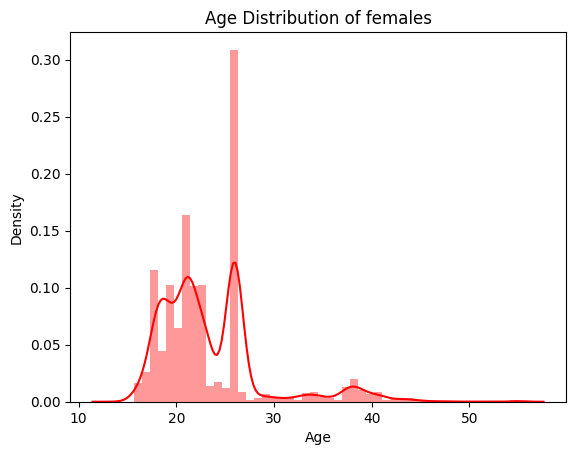

In [17]:
sns.distplot(df[df['Gender']=="Female"]['Age'],color="red")
plt.title("Age Distribution of females")
plt.show()

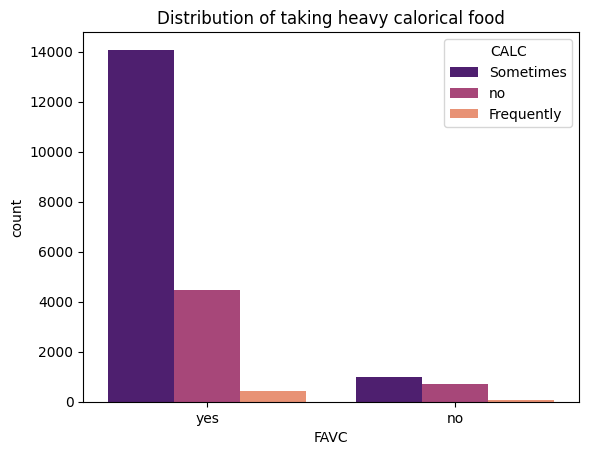

In [20]:
#distribution of taking heavy foods
sns.countplot(data=df,x="FAVC",palette="magma",hue="CALC")
plt.title("Distribution of taking heavy calorical food")
plt.show()

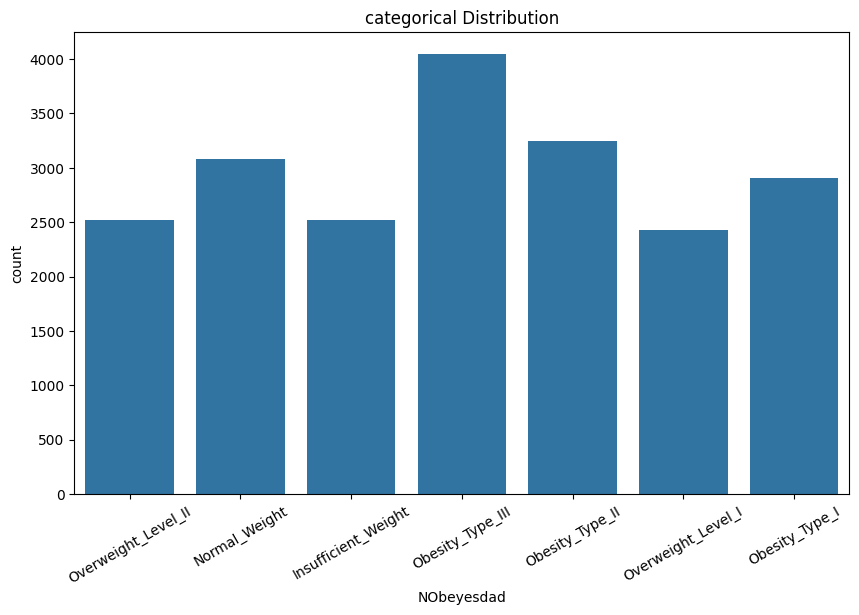

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="NObeyesdad")
plt.title("categorical Distribution")
plt.xticks(rotation=30)
plt.show()

In [27]:
age_by_obesity = df.groupby("NObeyesdad")['Age'].mean().reset_index()
age_by_obesity

,NObeyesdad,Age
0,Insufficient_Weight,19.336502
1,Normal_Weight,20.801388
2,Obesity_Type_I,25.023615
3,Obesity_Type_II,27.707128
4,Obesity_Type_III,24.126847
5,Overweight_Level_I,23.045197
6,Overweight_Level_II,26.032084


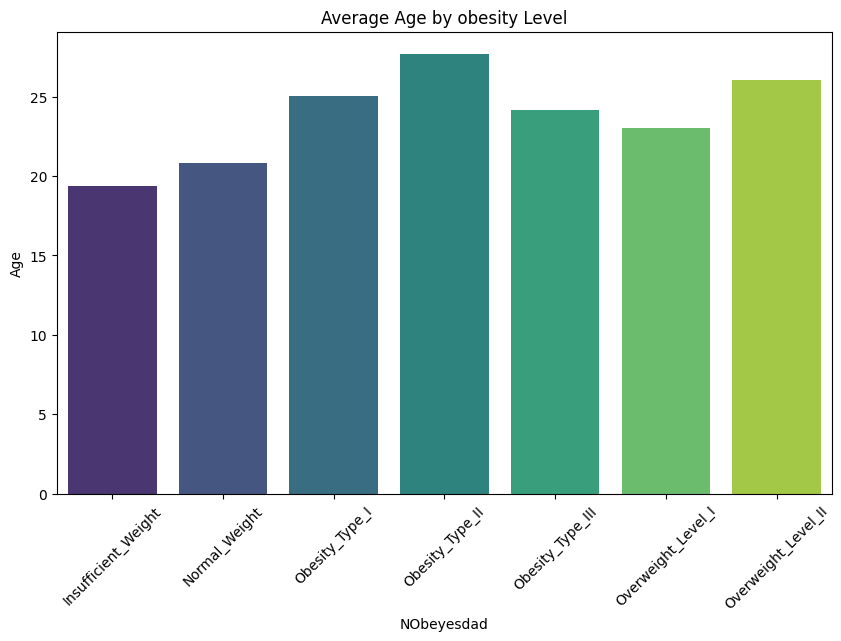

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=age_by_obesity,x="NObeyesdad",y="Age",palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Age by obesity Level")
plt.show()

# Applying Machine Learning

In [32]:
category

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [33]:
#separate the features and target variable
X = df.drop(['NObeyesdad'],axis=1)
y = df['NObeyesdad']

In [36]:
#convert categorical feature into numeric
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
categories = ['Gender',"family_history_with_overweight",'FAVC','CAEC','SMOKE',"SCC","CALC","MTRANS"]

for category in categories:
  X[category] = lbl.fit_transform(X[category])

In [37]:
X.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
rdf.score(X_test,y_test)

0.9007707129094412

In [44]:
from sklearn.metrics import confusion_matrix

y_pred = rdf.predict(X_test)

cnf = confusion_matrix(y_test,y_pred)
cnf

array([[496,  23,   0,   1,   0,   0,   0],
       [ 22, 544,   1,   0,   0,  27,  11],
       [  1,   1, 477,  16,   3,  16,  47],
       [  0,   0,  12, 621,   0,   0,   3],
       [  0,   0,   0,   0, 832,   0,   0],
       [  4,  51,   5,   0,   0, 357,  66],
       [  0,  11,  36,   3,   0,  52, 413]])

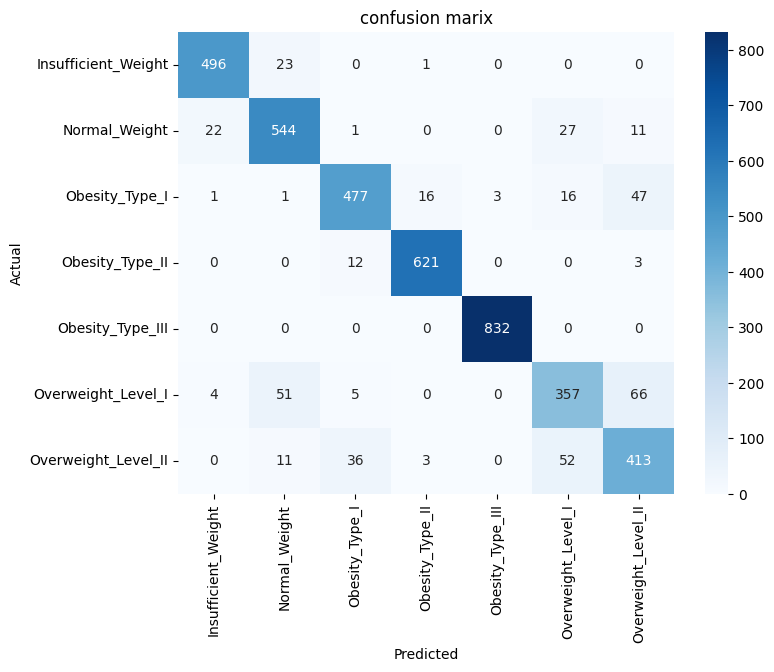

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(cnf,annot=True,cmap='Blues',fmt='g',xticklabels=rdf.classes_,yticklabels=rdf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion marix")
plt.show()